In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {
    'StudentID': range(1, 11),
    'Maths': [78, 85, np.nan, 95, 105, 65, 72, 89, 90, 300], # 300 is an outlier
    'Science':[88, 91, 85, np.nan, 89, 65, 70, 75, 78, 80],
    'English':[np.nan, 80, 70, 75, 65, 60, 100, 98, 85, 90],
    'Attendance': [90, 85, 80, 75, 70, 65, 60, 55, 100, 95],
    'Parental_Education_Level': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'Bachelor',
                                 'High School', 'High School', np.nan, 'PhD'],
}
df = pd.DataFrame(data)

df.set_index('StudentID', inplace=True)

df
    

,Maths,Science,English,Attendance,Parental_Education_Level
StudentID,,,,,
1,78.0,88.0,NaN,90,Bachelor
2,85.0,91.0,80.0,85,Master
3,NaN,85.0,70.0,80,PhD
4,95.0,NaN,75.0,75,Bachelor
5,105.0,89.0,65.0,70,Master
6,65.0,65.0,60.0,65,Bachelor
7,72.0,70.0,100.0,60,High School
8,89.0,75.0,98.0,55,High School
9,90.0,78.0,85.0,100,NaN


## **Scanning for missing values and inconsistencies** ##

In [4]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Maths                       1
Science                     1
English                     1
Attendance                  0
Parental_Education_Level    1
dtype: int64


**Handling the missing values**
- Numeric cols -> mean imputation
- Categorical cols -> mode imputation

In [6]:
# Filling the missing values with mean
df['Maths'].fillna(df['Maths'].mean())
df['Science'].fillna(df['Science'].mean())
df['English'].fillna(df['English'].mean())

# Filling categorical misssing values with mode
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])

df

,Maths,Science,English,Attendance,Parental_Education_Level
StudentID,,,,,
1,78.0,88.0,NaN,90,Bachelor
2,85.0,91.0,80.0,85,Master
3,NaN,85.0,70.0,80,PhD
4,95.0,NaN,75.0,75,Bachelor
5,105.0,89.0,65.0,70,Master
6,65.0,65.0,60.0,65,Bachelor
7,72.0,70.0,100.0,60,High School
8,89.0,75.0,98.0,55,High School
9,90.0,78.0,85.0,100,NaN


## **Handling Outlier** ##

In [ ]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column[(column < lower) | (column > upper)]

outliers_math = detect_outliers_iqr(df['Maths'])
print("Outliers in Math Score:\n", outliers_math)



def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column[(column < lower) | (column > upper)]

outliers_math = detect_outliers_iqr(df['Maths'])
print("Outliers in Math Score:", outliers_math)

Outliers in Math Score:
 StudentID
10    300.0
Name: Maths, dtype: float64


In [9]:
# Handling outlier via Winsorization method
def winsorize_series(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.clip(lower, upper)

df['Maths'] = winsorize_series(df['Maths'])




In [10]:
print(detect_outliers_iqr(df['Maths']))

Series([], Name: Maths, dtype: float64)


In [31]:
df['Attendance'].skew()

0.0

## **Data Transformation** ##

Attendance is **right-skewed**, and we want to normalize it using **log transformation**

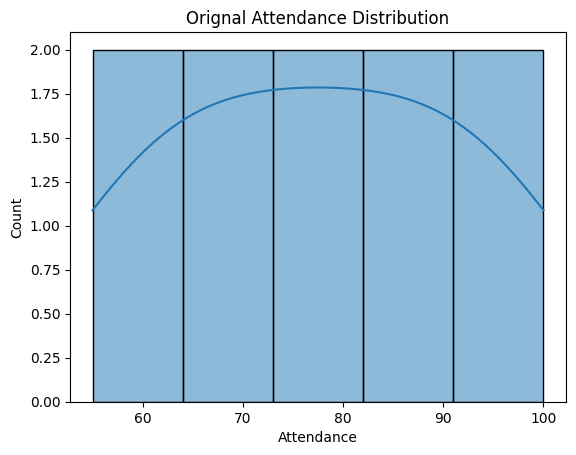

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot orignal Attendance distribution
sns.histplot(df['Attendance'], kde=True)
plt.title("Orignal Attendance Distribution")
plt.show()

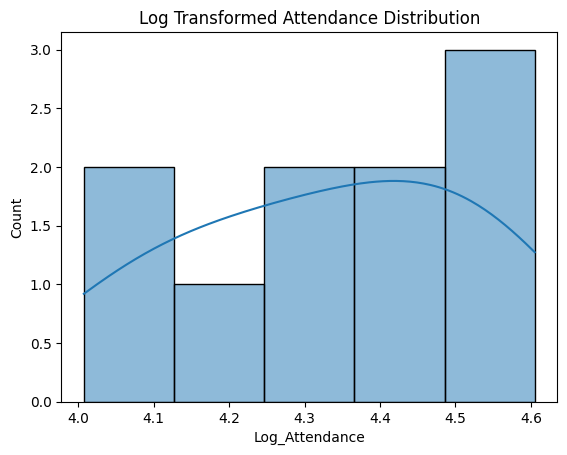

In [15]:
# Apply log transformation
df['Log_Attendance'] = np.log(df['Attendance'])

# Plot tranformed
sns.histplot(df['Log_Attendance'], kde=True)
plt.title("Log Transformed Attendance Distribution")
plt.show()